# Exploring Processing of Raw NMR Data

By: *Tyler Biggs*

In [1]:
import nmrglue as ng
import matplotlib.pyplot as plt
%matplotlib inline

### Read .fid file

In [2]:
# Assign a path of an NMR fid file / folder. In the case of
# Varian instruments this is actually a file.
nmr_path = '/home/tylerbiggs/data/Sep-2016-23Na/VT/25C.fid'

In [3]:
# Read the data with nmrglue, this creates a dict of experimental values,
# as well as a numpy array of the data contained within.
nmr_dict, nmr_data = ng.varian.read(nmr_path)

In [108]:
# nmr_dict

### Plot Free Induction Decay

/home/tylerbiggs/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


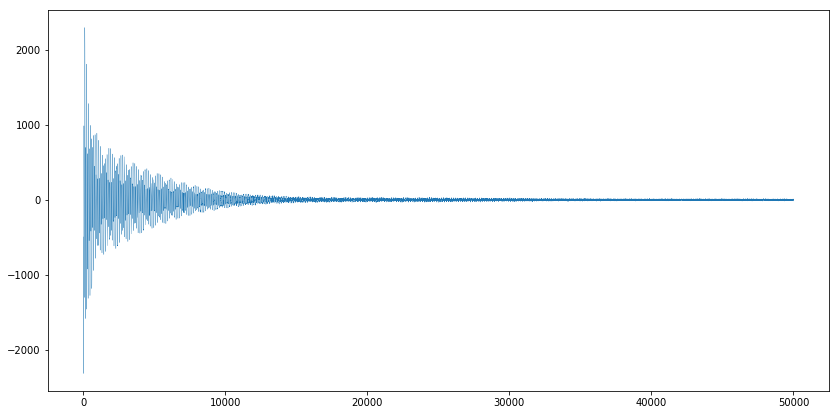

In [4]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)
ax.plot(nmr_data, linewidth=0.3)

#### Zoom in on the region of interest

/home/tylerbiggs/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0, 10000)

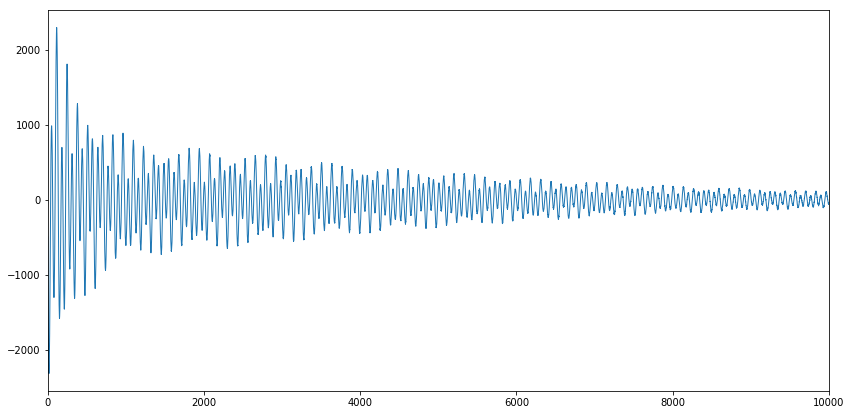

In [5]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)
ax.plot(nmr_data, linewidth=1)
ax.set_xlim([0, 10000])

### Fourier transforms

In [6]:
nmr_fft = ng.process.proc_base.fft(nmr_data)

/home/tylerbiggs/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


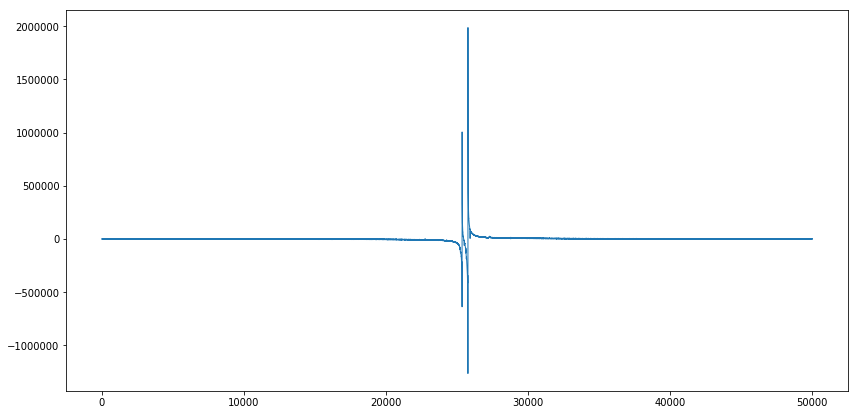

In [7]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)
ax.plot(nmr_fft, linewidth=1)

### Auto phase the data

The real and imaginary portions of the data are out of alignment.

In [8]:
nmr_fft_acme = ng.process.proc_autophase.autops(nmr_fft, 'acme')
nmr_fft_peak_minima = ng.process.proc_autophase.autops(nmr_fft, 'peak_minima')

Optimization terminated successfully.
         Current function value: 12456785920009.968750
         Iterations: 112
         Function evaluations: 231
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 69
         Function evaluations: 133


/home/tylerbiggs/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(25000, 26000)

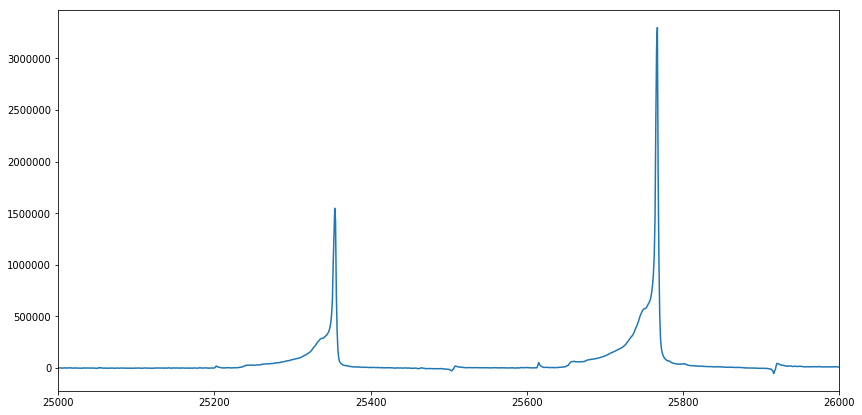

In [9]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)
ax.plot(nmr_fft_acme)
ax.set_xlim([25000, 26000])

/home/tylerbiggs/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(25000, 26000)

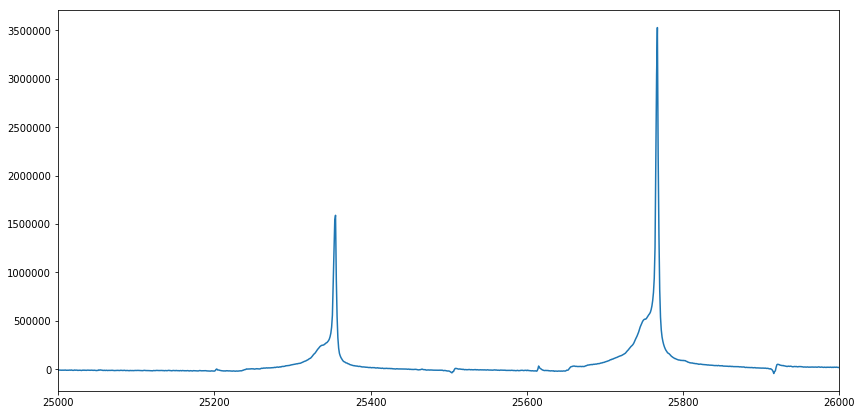

In [10]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)
ax.plot(nmr_fft_peak_minima)
ax.set_xlim([25000, 26000])

/home/tylerbiggs/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(25000, 26000)

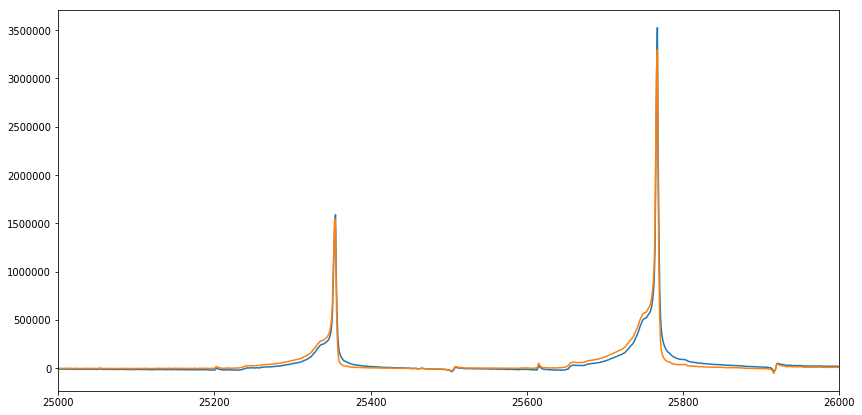

In [36]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)
ax.plot(nmr_fft_peak_minima)
ax.plot(nmr_fft_acme)
ax.set_xlim([25000, 26000])

In [39]:
udic = ng.varian.guess_udic(nmr_dict, nmr_data)

In [41]:
C = ng.convert.converter()
C.from_varian(nmr_dict, nmr_data, udic)

In [46]:
pipe_dict, pipe_data = C.to_pipe()

In [47]:
uc = ng.pipe.make_uc(pipe_dict, pipe_data)

In [49]:
pipe_fft = ng.process.proc_base.fft(pipe_data)

In [50]:
pipe_fft_acme = ng.process.proc_autophase.autops(pipe_fft, 'acme')

Optimization terminated successfully.
         Current function value: 12456906752009.968750
         Iterations: 111
         Function evaluations: 227


/home/tylerbiggs/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(1.002, 1.02)

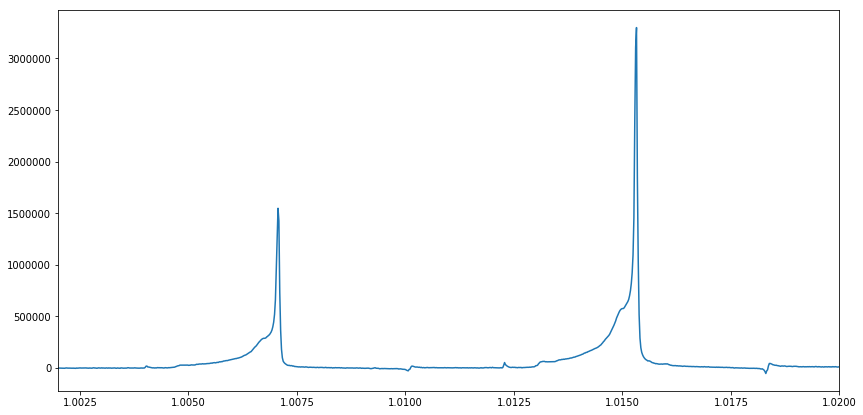

In [85]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)
ax.plot(uc.ppm_scale(), pipe_fft_acme)
ax.set_xlim([1.002, 1.02])

In [61]:
ng.analysis.peakpick.pick(pipe_fft_acme, 100000)

/home/tylerbiggs/anaconda3/envs/py36/lib/python3.6/site-packages/nmrglue/analysis/peakpick.py:386: ComplexWarning: Casting complex values to real discards the imaginary part
  scale.append(float(sc))
/home/tylerbiggs/anaconda3/envs/py36/lib/python3.6/site-packages/nmrglue/fileio/table.py:364: ComplexWarning: Casting complex values to real discards the imaginary part
  new_rec[name] = col.astype(format)


rec.array([(24233., 1, 4.18871649, 38218688.),
           (24646., 2, 4.55149908, 16668101.)],
          dtype=[('X_AXIS', '<f8'), ('cID', '<i8'), ('X_LW', '<f8'), ('VOL', '<f8')])

In [80]:
# pipe_dict, pipe_data
# pipe_dict, pipe_data = ng.pipe_proc.sp(pipe_dict, pipe_data)
# pipe_dict, pipe_data = ng.pipe_proc.zf(pipe_dict, pipe_data)
# pipe_dict, pipe_data = ng.pipe_proc.ft(pipe_dict, pipe_data)
# pipe_dict, pipe_data = ng.pipe_proc.ps(pipe_dict, pipe_data)
pipe_data = ng.process.proc_autophase.autops(pipe_fft, 'peak_minima')
pipe_dict, pipe_data = ng.pipe_proc.di(pipe_dict, pipe_data)

uc = ng.pipe.make_uc(pipe_dict, pipe_data)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 72
         Function evaluations: 137


(24000, 25000)

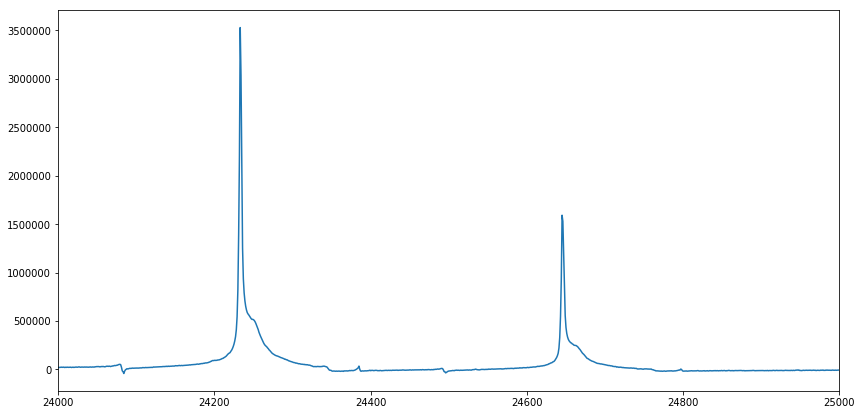

In [83]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)
ax.plot(pipe_data)
ax.set_xlim([24000, 25000])

In [84]:
ng.analysis.peakpick.pick(pipe_data, 100000)

rec.array([(24233., 1, 3.98164063, 37155068.),
           (24645., 2, 4.635308  , 15253253.)],
          dtype=[('X_AXIS', '<f8'), ('cID', '<i8'), ('X_LW', '<f8'), ('VOL', '<f8')])

In [86]:
ng.analysis.integration.integrate(pipe_data, uc, [1.005, 1.01])

array([385.60675], dtype=float32)

In [110]:
26.077 * 5

130.38500000000002

In [115]:
(24233 - 130.385) / 500e6 * 1e6

48.20523000000001

In [91]:
ng.analysis.peakpick.pick(pipe_data, 40000)

rec.array([(24072., 1, 0.        , 4.08085273e+04),
           (24079., 2, 6.        , 3.30536531e+05),
           (24155., 3, 0.        , 4.17247539e+04),
           (24158., 4, 0.        , 4.12386484e+04),
           (24233., 5, 3.98164063, 4.22526320e+07),
           (24645., 6, 4.635308  , 1.77082380e+07)],
          dtype=[('X_AXIS', '<f8'), ('cID', '<i8'), ('X_LW', '<f8'), ('VOL', '<f8')])

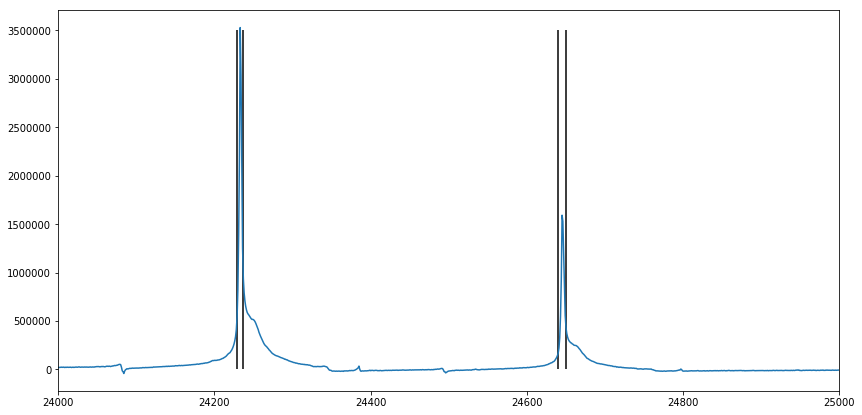

In [102]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)
ax.plot(pipe_data)
ax.set_xlim([24000, 25000])
# ax.vlines(24233, 0, 3500000)
ax.vlines(24233 - 3.98164063, 0, 3500000)
ax.vlines(24233 + 3.98164063, 0, 3500000)

ax.vlines(24645 - 4.635308, 0, 3500000)
ax.vlines(24645 + 4.635308, 0, 3500000)